In [12]:
using StatisticalRethinking
gr(size=(500,500));

Turing.setadbackend(:reverse_diff)

ProjDir = rel_path("..", "chapters", "04")
cd(ProjDir)

### snippet 4.43

In [13]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [14]:
df2 = filter(row -> row[:age] >= 18, df);

Center the weight observations and add a column to df2

In [15]:
mean_weight = mean(df2[:weight])
df2 = hcat(df2, df2[:weight] .- mean_weight)
rename!(df2, :x1 => :weight_c) # Rename our col x1 => log_gdp

,height,weight,age,male,weight_c
,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64
1,151.765,47.8256,63.0,1,2.83512
2,139.7,36.4858,63.0,0,-8.50468
3,136.525,31.8648,65.0,0,-13.1256
4,156.845,53.0419,41.0,1,8.05143
5,145.415,41.2769,51.0,0,-3.71361
6,163.83,62.9926,35.0,1,18.0021
7,149.225,38.2435,32.0,0,-6.74701
8,168.91,55.48,27.0,1,10.4895
9,147.955,34.8699,19.0,0,-10.1206


Extract variables for Turing model

In [16]:
y = convert(Vector{Float64}, df2[:height]);
x = convert(Vector{Float64}, df2[:weight_c]);

Define the regression model

In [17]:
@model line(y, x) = begin
    #priors
    alpha ~ Normal(178.0, 100.0)
    beta ~ Normal(0.0, 10.0)
    s ~ Uniform(0, 50)

    #model
    mu = alpha .+ beta*x
    for i in 1:length(y)
      y[i] ~ Normal(mu[i], s)
    end
end;

Draw the samples

In [18]:
chn = sample(line(y, x), Turing.NUTS(1000, 0.65));

┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/packages/Turing/NuLQp/src/samplers/support/hmc_core.jl:246
[NUTS{Turing.FluxTrackerAD,Any}] found initial ϵ: 0.1
└ @ Turing /Users/rob/.julia/packages/Turing/NuLQp/src/samplers/support/hmc_core.jl:291
[NUTS] Sampling...  1%  ETA: 0:02:17
  ϵ:         0.030621510185477197
  α:         0.971444984407535
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  2%  ETA: 0:01:48
  ϵ:         0.07507512342948845
  α:         0.8506390478602415
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  3%  ETA: 0:01:49
  ϵ:         0.07105035532718221
  α:         0.8526278877395898
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  5%  ETA: 0:01:33
  ϵ:         0.13900175864238534
  α:         0.0
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  6%  ETA: 0:01:24
  ϵ:         0.0377494605487467
  α:         0.979311853297689
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  7%  ETA: 0:01:35
  ϵ:         0.02326519975

4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 50%  ETA: 0:00:55
  ϵ:         0.017489709739525426
  α:         0.9964921135465479
┌ Info:  Adapted ϵ = 0.05870745011128406, std = [1.0, 1.0, 1.0]; 500 iterations is used for adaption.
└ @ Turing /Users/rob/.julia/packages/Turing/NuLQp/src/samplers/adapt/adapt.jl:91



[NUTS] Sampling... 51%  ETA: 0:00:53
  ϵ:         0.05870745011128406
  α:         0.9367030050256292
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 53%  ETA: 0:00:50
  ϵ:         0.05870745011128406
  α:         0.9877058362545301
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 54%  ETA: 0:00:48
  ϵ:         0.05870745011128406
  α:         0.7598424344290833
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 56%  ETA: 0:00:46
  ϵ:         0.05870745011128406
  α:         0.9870281485076235
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 57%  ETA: 0:00:44
  ϵ:         0.05870745011128406
  α:         0.3142489682488212
4m  pre_cond:  [1.0, 1.0, 1.0]


[N

[NUTS] Finished with
  Running time        = 93.74648591900004;
  #lf / sample        = 0.002;
  #evals / sample     = 20.272;
  pre-cond. metric    = [1.0, 1.0, 1.0].


[NUTS] Sampling...100% Time: 0:01:34


Describe the chain result

In [19]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
              Mean            SD        Naive SE        MCSE         ESS    
   alpha   153.14719937  10.810424888 0.3418556512  1.4582064846   54.960095
    beta     0.90585034   0.079704618 0.0025204813  0.0016389693 1000.000000
  lf_num     0.00200000   0.063245553 0.0020000000  0.0020000000 1000.000000
       s     6.00564996   5.329796821 0.1685429742  0.8996190097   35.099753
 elapsed     0.09374649   0.099242518 0.0031383240  0.0055587373  318.744897
 epsilon     0.07237568   0.136671220 0.0043219234  0.0087528107  243.814242
      lp -1112.05625117 171.984325602 5.4386219075 28.3846353549   36.712258
eval_num    20.27200000  20.520309430 0.6489091609  1.1679058181  308.711044
  lf_eps     0.07237568   0.136671220 0.0043219234  0.0087528107  243.814242

Quantiles:
               2.5%           25.0%          50.0%          75.0%          97.5%    
   alpha   143.00451321

Compare with a previous result

In [20]:
clip_43s_example_output = "

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
         Mean        SD       Naive SE       MCSE      ESS
alpha 154.597086 0.27326431 0.0043206882 0.0036304132 1000
 beta   0.906380 0.04143488 0.0006551430 0.0006994720 1000
sigma   5.106643 0.19345409 0.0030587777 0.0032035103 1000

Quantiles:
          2.5%       25.0%       50.0%       75.0%       97.5%
alpha 154.0610000 154.4150000 154.5980000 154.7812500 155.1260000
 beta   0.8255494   0.8790695   0.9057435   0.9336445   0.9882981
sigma   4.7524368   4.9683400   5.0994450   5.2353100   5.5090128
";

Example result for Turing with centered weights

In [21]:
clip_43t_example_hpd = "

MCMCChain.hpd(chn)

             95% Lower        95% Upper
   alpha   126.00203040343   170.13685381
    beta     0.77550323206     1.12283412
       s     4.59914079361    44.68498531

";

Plot the regerssion line and observations

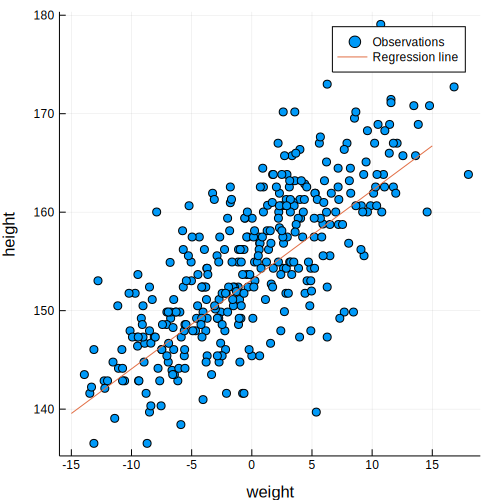

In [22]:
xi = -15.0:0.1:15.0
yi = mean(chn[:alpha]) .+ mean(chn[:beta])*xi

scatter(x, y, lab="Observations", xlab="weight", ylab="height")
plot!(xi, yi, lab="Regression line")

End of `clip_43t.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*